In [7]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json
import os
import re
import seaborn as sns
import math

In [9]:
def read_total_size_data(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='caida20180517_10_caida20180816_0.pcap', window_size=200):
    res = []
    for epoch in epochs:
        
        path = f"../SketchPatternQuery/{algo}/{dataset}/"\
                f"{flowkey}/row_{row}_width_{width}_level_{level}_epoch_{epoch}_count_{count}_seed_{seed}/"
        
        for dir in sorted(os.listdir(path)):
            p = os.path.join(path, dir)
            if os.path.isdir(p): 
                window_dir = "window_" + str(window_size)
                full_path = os.path.join(path, dir, window_dir,'total_flow_size.txt')    
                with open(full_path, 'r') as f:
                    for val in f:
                        res.append(int(val))
            
    return res

# read_total_size_data()

## Prepare Dataset

In [49]:
## parameters

caida = ["caida0517-125w", "caida0517-250w", "caida0816-150w", "caida0816-300w", "caida0816-600w"]
zipf = ["zipf2a-75w", "zipf2a-150w", "zipf2b-10w", "zipf2b-40w", "zipf4-60w", "zipf2a-35w", "zipf4-30w"]


lens = [
        ["5", "5"],
        ["6", "4"],
        ["7", "3"],
        ["8", "2"],
        ]

pcap_file = []
    
# # single dataset
# pcap_file.append("caida0517-500w_10_.pcap")
# pcap_file.append("caida0816-600w_10_.pcap")
# pcap_file.append("zipf2a-150w_10_.pcap") 
# pcap_file.append("zipf2b-40w_10_.pcap") 
# pcap_file.append("zipf4-60w_10_.pcap")


# # same dist, diff tfs
# for l in lens:
#     pcap_file.append(f'{caida[4]}_{l[0]}_{caida[3]}_{l[1]}.pcap')
#     pcap_file.append(f'{caida[3]}_{l[0]}_{caida[4]}_{l[1]}.pcap')
#     pcap_file.append(f'{caida[4]}_{l[0]}_{caida[1]}_{l[1]}.pcap')
#     pcap_file.append(f'{caida[1]}_{l[0]}_{caida[4]}_{l[1]}.pcap')
#     pcap_file.append(f'{caida[0]}_{l[0]}_{caida[4]}_{l[1]}.pcap')
#     pcap_file.append(f'{caida[4]}_{l[0]}_{caida[0]}_{l[1]}.pcap')
#     pcap_file.append(f'{zipf[1]}_{l[0]}_{zipf[3]}_{l[1]}.pcap')
#     pcap_file.append(f'{zipf[3]}_{l[0]}_{zipf[1]}_{l[1]}.pcap')
#     pcap_file.append(f'{zipf[0]}_{l[0]}_{zipf[2]}_{l[1]}.pcap')
#     pcap_file.append(f'{zipf[2]}_{l[0]}_{zipf[0]}_{l[1]}.pcap')

# # # diff dist, same tfs
for l in lens:
    pcap_file.append(f'{caida[2]}_{l[0]}_{zipf[1]}_{l[1]}.pcap')
    pcap_file.append(f'{zipf[1]}_{l[0]}_{caida[2]}_{l[1]}.pcap')
    pcap_file.append(f'{zipf[5]}_{l[0]}_{zipf[6]}_{l[1]}.pcap')
    pcap_file.append(f'{zipf[6]}_{l[0]}_{zipf[5]}_{l[1]}.pcap')

# # # diff dist, diff tfs
# for l in lens:
#     pcap_file.append(f'{caida[4]}_{l[0]}_{zipf[1]}_{l[1]}.pcap')
#     pcap_file.append(f'{zipf[1]}_{l[0]}_{caida[4]}_{l[1]}.pcap')
#     pcap_file.append(f'{caida[4]}_{l[0]}_{zipf[3]}_{l[1]}.pcap')
#     pcap_file.append(f'{zipf[3]}_{l[0]}_{caida[4]}_{l[1]}.pcap')
#     pcap_file.append(f'{caida[4]}_{l[0]}_{zipf[4]}_{l[1]}.pcap')
#     pcap_file.append(f'{zipf[4]}_{l[0]}_{caida[4]}_{l[1]}.pcap')
#     pcap_file.append(f'{zipf[1]}_{l[0]}_{zipf[4]}_{l[1]}.pcap')
#     pcap_file.append(f'{zipf[4]}_{l[0]}_{zipf[1]}_{l[1]}.pcap')

print(pcap_file)    
print(f'Total Pcap File Number: {len(pcap_file)}')
# widths = [2048, 4096, 8192, 16384, 32768, 65536, 131072]
widths = [4096]
# widths = [1024]



['caida0816-150w_5_zipf2a-150w_5.pcap', 'zipf2a-150w_5_caida0816-150w_5.pcap', 'zipf2a-35w_5_zipf4-30w_5.pcap', 'zipf4-30w_5_zipf2a-35w_5.pcap', 'caida0816-150w_6_zipf2a-150w_4.pcap', 'zipf2a-150w_6_caida0816-150w_4.pcap', 'zipf2a-35w_6_zipf4-30w_4.pcap', 'zipf4-30w_6_zipf2a-35w_4.pcap', 'caida0816-150w_7_zipf2a-150w_3.pcap', 'zipf2a-150w_7_caida0816-150w_3.pcap', 'zipf2a-35w_7_zipf4-30w_3.pcap', 'zipf4-30w_7_zipf2a-35w_3.pcap', 'caida0816-150w_8_zipf2a-150w_2.pcap', 'zipf2a-150w_8_caida0816-150w_2.pcap', 'zipf2a-35w_8_zipf4-30w_2.pcap', 'zipf4-30w_8_zipf2a-35w_2.pcap']
Total Pcap File Number: 16


### Plot Total Flow Size

In [42]:
def plot_total_size_summation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=500):
    
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Var", "Dynamic TopK Var", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    labels = ["Final TopK Sum", "Final TopK Sec Var",]

    res = []
    # sum
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    res.append(result)
       
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    # print(dataset)
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Flow Size Summation (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

# datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
datasets = ["zipf2a_3_caida20180517_7.pcap/"]
# window_sizes = [100, 200, 500]
window_sizes = [200]
# plot_single_both(dataset=pcap_file[4], window_size=200)
# plot_single_both(dataset=datasets[0], window_size=500)

In [44]:
def plot_total_size_variation(algo='cm', row=3, width=4096, level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], dataset='zipf2a_3_caida20180517_7.pcap', window_size=500):
    
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Var", "Dynamic TopK Var", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    # labels = ["Final TopK Sum", "Dynamic TopK Sum", "Final TopK Sec Var", "Dynamic TopK Sec Var"]
    labels = ["Final TopK Sum", "Final TopK Sec Var",]

    res = []
    # sum
    result = read_total_size_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, window_size)
    
    # res.append(result)
    
    # variation
    fin_res_var = [None]
    for i in range(1, len(result)):
        fin_res_var.append(result[i] - result[i-1])
        
    # res.append(fin_res_var)
    
    # second variation
    fin_sec_res_var = [None, None]
    for i in range(2, len(result)):
        fin_sec_res_var.append(abs(fin_res_var[i] - fin_res_var[i-1]))
        
    res.append(fin_sec_res_var)
    
    print(labels, len(labels))
    print(res, len(res))
    print(result)
    print(fin_res_var)
    print(fin_sec_res_var, len(res))
    print(f'max: {max(fin_res_var[1:])}, avg: {sum(fin_res_var[1:])/len(fin_res_var[1:])}, diff: {max(fin_res_var[1:]) - (sum(fin_res_var[1:])/len(fin_res_var[1:]))}')
    
    plt.figure(figsize=(12, 4))
    
    # sns.lineplot(data=res, dashes=False, markers=True, markersize=4)
    # for i, data_set in enumerate(res):
    #     plt.plot(range(1,21), data_set, label=f'Data Set {i + 1}')
        
    # print(dataset)
    for i in range(len(res)):
        plt.plot(res[i], label=labels[i])
        

    # Add labels and legend
    plt.xlabel('Time (sec)')
    plt.ylabel('Value')
    plt.title('%s Flow Size Variation (Window Size = %d)' % (dataset[:-5], window_size))
    # plt.axhline(10000, c="black")
    ticks = [i for i in range(int(10*1000/window_size) + 1)]
    adjusted_ticks = [tick * (window_size / 1000) for tick in ticks[0::int(1000 / window_size)]]
    plt.xticks(ticks[0::int(1000/window_size)], adjusted_ticks)
    plt.legend(loc='upper left', ncol=math.ceil(len(res)/4))

    # Show the plot
    plt.show()
    

# datasets = ['10_0.pcap/', '5_5.pcap/', '4_6.pcap/', '3_7.pcap/']
datasets = ["zipf2a_3_caida20180517_7.pcap/"]
# window_sizes = [100, 200, 500]
window_sizes = [200]
# plot_single_both(dataset=pcap_file[4], window_size=200)
# plot_single_both(dataset=datasets[0], window_size=500)

['Final TopK Sum', 'Final TopK Sec Var'] 2
[[None, None, 6266, 2380, 609, 178, 92, 407, 176, 2175, 1836, 1012, 554, 948, 303, 78, 65, 1390, 317, 438, 287, 535, 688, 727, 448, 458, 558, 161, 526, 538, 8, 2435, 960, 2498, 2675, 371, 250, 1048, 226, 431, 64, 296, 203, 1388, 145, 393, 1406, 1038, 160, 288, 464]] 1
[0, 16154, 26042, 33550, 40449, 47170, 53983, 60389, 66619, 75024, 81593, 87150, 93261, 98424, 103284, 108066, 112913, 119150, 125070, 130552, 136321, 142625, 148241, 154584, 161375, 167708, 173483, 179097, 184185, 189811, 195429, 203482, 210575, 220166, 227082, 234369, 241906, 248395, 255110, 261394, 267614, 274130, 280443, 285368, 290148, 295321, 301900, 309517, 316974, 324143, 330848]
[None, 16154, 9888, 7508, 6899, 6721, 6813, 6406, 6230, 8405, 6569, 5557, 6111, 5163, 4860, 4782, 4847, 6237, 5920, 5482, 5769, 6304, 5616, 6343, 6791, 6333, 5775, 5614, 5088, 5626, 5618, 8053, 7093, 9591, 6916, 7287, 7537, 6489, 6715, 6284, 6220, 6516, 6313, 4925, 4780, 5173, 6579, 7617, 7457, 7

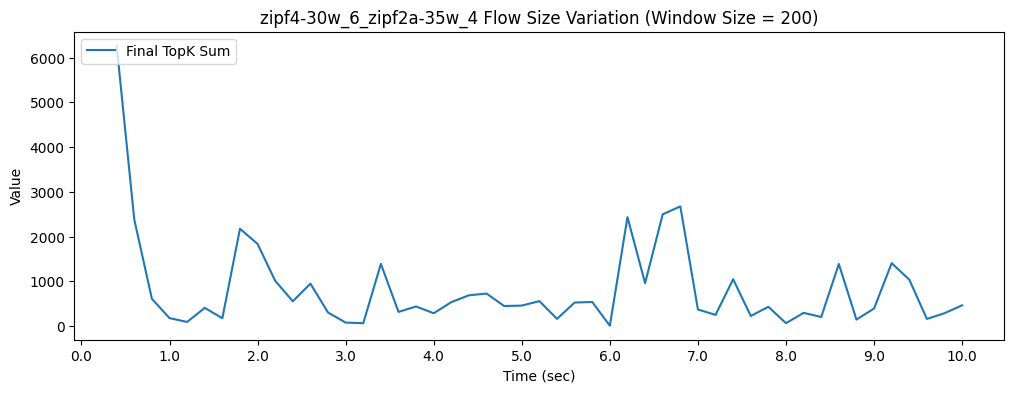

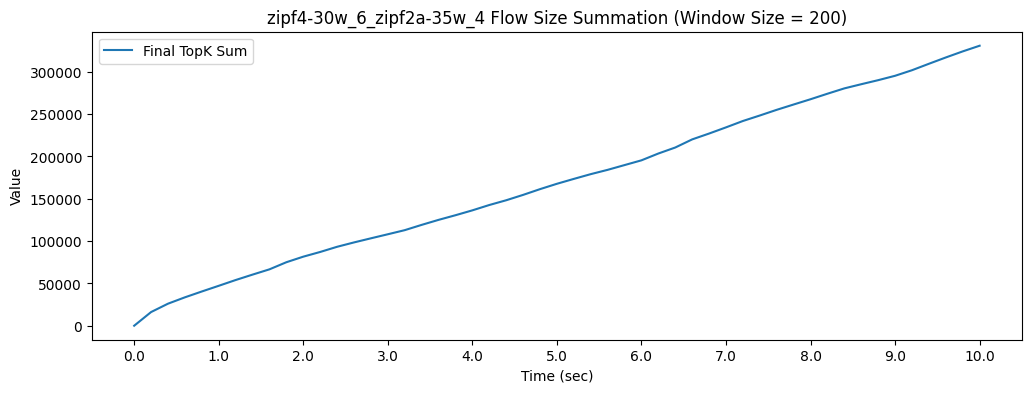

In [54]:
plot_total_size_variation(dataset=pcap_file[7], window_size=200)
plot_total_size_summation(dataset=pcap_file[7], window_size=200)

### Predict Total Flow Size

In [2]:
def changes_occured(var, sec_var, n, ws=20):
    
    time_var = -1.0
    time_sec_var = -1.0
    
    val = 0
    max_time = -1.0
    
    # for each sliding window
    for i in range(len(var) - ws + 1):
        var_mean = np.mean(var[0+i:ws+i])
        var_std_dev = np.std(var[0+i:ws+i])
        
        # check by var outliers
        if abs(var[ws+i-1] - var_mean) > (n * var_std_dev):
            if time_var == -1.0:
                time_var = (1+(ws+i-1)-1)/5
                break
                
    for i in range(len(sec_var) - ws + 1):            
        sec_var_mean = np.mean(sec_var[0+i:ws+i])
        sec_var_std_dev = np.std(sec_var[0+i:ws+i])
        
        # check by sec var outliers
        if abs(sec_var[ws+i-1] - sec_var_mean) > (n * sec_var_std_dev):
            if time_sec_var == -1.0:
                time_sec_var = (2+(ws+i-1)-1)/5
                val = sec_var[ws+i-1]
                break
                
    if val == 0:
        val = max(sec_var)
        max_time = (2 + sec_var.index(val) - 1)/5
        
    
    var_hit = 0
    sec_var_hit = 0
    
    if time_var != -1.0:
        var_hit = 1
    if time_sec_var != -1.0:
        sec_var_hit = 1
    
    return var_hit, time_var, sec_var_hit, time_sec_var, val, max_time
    
    

In [3]:
def predict(algo='cm', row=3, width=[4096], level=1, seed=1, count=1, flowkey='srcIP', 
              epochs=['10'], datasets=['zipf2a_3_caida20180517_7.pcap'], window_size=200, dev=3, ws=20):
    
    # total flow size
    res_sum3 = {}
    res_var3 = {}
    res_sec_var3 = {}
    
    label = []
    answer = []
    
    for d in datasets:
        for w in width:
            name = f'{d[:-5]}_{w}'
            res_var3[name] = [None]
            res_sec_var3[name] = [None, None]
            
            res_total = read_total_size_data(algo, row, w, level, seed, count, flowkey, epochs, d, window_size)

            label.append(name)
            answer.append(int(d.split('_')[1]))
            # answer.append(10)
            
            res_sum3[name] = res_total
            
            for i in range(1, len(res_total)):
                res_var3[name].append(res_total[i] - res_total[i-1])
                
            for i in range(2, len(res_var3[name])):
                res_sec_var3[name].append(abs(res_var3[name][i] - res_var3[name][i-1]))
            
    # res = read_data(algo, row, width, level, seed, count, flowkey, epochs, dataset, type, window_size)
    # print(label, len(label))
    # print(res_sum, len(res_sum))
    # print(res_var, len(res_var))
    # print(res_sec_var, len(res_sec_var))
    
    # print(answer)
    ignore = int(1000/window_size)
    choose = 5
    # dev = 3.4 # 99.90%
    # dev = 3 # 99.90%
    # dev = 3.719 # 99.99%
    iqr = 1.5
    # ws = 20
    
    pred3 = []
    
    norm_hit3 = 0
    iqr_hit3 = 0
    
    hit3 = []
    
    for i in range(len(label)):
        
        var_hit, time_var, sec_var_hit, time_sec_var, val, max_time = changes_occured(res_var3[label[i]][1:], res_sec_var3[label[i]][2:], dev, ws)
        
        pred3.append(time_sec_var)
           
        print(i)
        print(label[i])
        print('\tTotal Flow ')
        # print('\t\t', var_max3, var_avg3, var_diff3)
        # print('\t\t', max(res_sec_var3[label[i]][(1+ignore):end]), sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end]), max(res_sec_var3[label[i]][(1+ignore):end]) - (sum(res_sec_var3[label[i]][(1+ignore):end]) / len(res_sec_var3[label[i]][(1+ignore):end])))
        print('\t\t', res_sec_var3[label[i]])
        print(f'\t\tvar: {time_var}, ans: {answer[i]}, change: {var_hit}')
        print(f'\t\tsec var: {time_sec_var}, ans: {answer[i]}, change: {sec_var_hit}')
        print(f'\t\t{val}, max time: {max_time}')
        print()
        
        if answer[i] == 10:
            if sec_var_hit == 0:
                hit3.append(1)
            else:
                hit3.append(0)
        else:
            if sec_var_hit == 1:
                hit3.append(1)
            else:
                hit3.append(0)
            
        

    succ3 = 0

    for i in range(len(label)):
        if hit3[i] == 1:
            if answer[i] == 10:
                succ3 += 1
            else:
                if abs(pred3[i] - answer[i]) <= 1.0:
                    succ3 += 1
    
    print("single comprehensive predict")
    print(f' total flow  predict: {succ3}/{len(pred3)} {succ3*100/len(pred3)}%')
    print()
    
    
    
    
        
# predict_final_dynamic_topk(width=widths, datasets=pcap_file)

In [50]:
predict(width=widths, datasets=pcap_file, window_size=200, dev=3, ws=25)

0
caida0816-150w_5_zipf2a-150w_5_4096
	Total Flow 
		 [None, None, 2864, 4482, 1011, 600, 4192, 271, 974, 4923, 1124, 4498, 1843, 3239, 3045, 3033, 3042, 2523, 140, 3060, 5286, 1172, 366, 1328, 152, 2018, 890, 3655, 2814, 6058, 3872, 930, 2598, 2117, 1702, 1220, 3892, 3889, 5362, 93, 4028, 1397, 4621, 76, 915, 1007, 534, 203, 3286, 3397, 1826]
		var: -1.0, ans: 5, change: 0
		sec var: -1.0, ans: 5, change: 0
		6058, max time: 5.6

1
zipf2a-150w_5_caida0816-150w_5_4096
	Total Flow 
		 [None, None, 3618, 2791, 6045, 3855, 957, 2559, 2097, 1719, 1245, 3994, 3928, 5376, 99, 4009, 1431, 4587, 50, 940, 964, 521, 213, 3306, 3415, 1739, 1473, 2735, 4393, 1001, 593, 4181, 304, 976, 4972, 1095, 4507, 1872, 3266, 3005, 3062, 3047, 2507, 128, 3016, 5215, 1175, 224, 1425, 149, 2096]
		var: -1.0, ans: 5, change: 0
		sec var: -1.0, ans: 5, change: 0
		6045, max time: 0.6

2
zipf2a-35w_5_zipf4-30w_5_4096
	Total Flow 
		 [None, None, 961, 2493, 2653, 343, 283, 1067, 234, 454, 45, 291, 202, 1391, 141, 4